# Task1 + Task2

## Understanding and exploratory

Goal of this competition: 

- predict the category of each news. 


Evaluation: 

- Avg value of f1_score. 

- A comparation between submitting category result and real category data 


In [81]:
import pandas as pd
import numpy as np
import os
import sys

In [104]:
df_testa=pd.read_csv('C:/Chen/1_Coding/20200721_nlp_learning/test_a.csv',sep='\t')

In [105]:
df_train=pd.read_csv('C:/Chen/1_Coding/20200721_nlp_learning/train_set.csv',sep='\t')

In [106]:
df_output.head().append(df_test.tail())

C:\Users\xingy\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,text,text_len
0,5399 3117 1070 4321 4568 2621 5466 3772 4516 2...,NaN
1,2491 4109 1757 7539 648 3695 3038 4490 23 7019...,NaN
2,2673 5076 6835 2835 5948 5677 3247 4124 2465 5...,NaN
3,4562 4893 2210 4761 3659 1324 2595 5949 4583 2...,NaN
4,4269 7134 2614 1724 4464 1324 3370 3370 2106 2...,NaN
49995,3725 4498 2282 1647 6293 4245 4498 3615 1141 2...,1484.0
49996,4811 465 3800 1394 3038 2376 2327 5165 3070 57...,995.0
49997,5338 1952 3117 4109 299 6656 6654 3792 6831 21...,394.0
49998,893 3469 5775 584 2490 4223 6569 6663 2124 168...,957.0
49999,2400 4409 4412 2210 5122 4464 7186 2465 1327 9...,1728.0


In [107]:
df_train.head().append(df_train.tail())

,label,text
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 549...
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...
199995,2,307 4894 7539 4853 5330 648 6038 4409 3764 603...
199996,2,3792 2983 355 1070 4464 5050 6298 3782 3130 68...
199997,11,6811 1580 7539 1252 1899 5139 1386 3870 4124 1...
199998,2,6405 3203 6644 983 794 1913 1678 5736 1397 191...
199999,3,4350 3878 3268 1699 6909 5505 2376 2465 6088 2...


In [108]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
label    200000 non-null int64
text     200000 non-null object
dtypes: int64(1), object(1)
memory usage: 3.1+ MB


In [109]:
df_testa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 1 columns):
text    50000 non-null object
dtypes: object(1)
memory usage: 390.7+ KB


In [110]:
df_train.describe()

,label
count,200000.000000
mean,3.210950
std,3.084955
min,0.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,13.000000


In [111]:
df_testa.describe()

,text
count,50000
unique,49995
top,2538 2506 1363 5466 3772 340 922 433 2397 5778...
freq,4


In [112]:
#In order to know the length of sentences
#The number of words in sentence
df_train['text_len'] = df_train['text'].apply(lambda x: len(x.split(' ')))
print(df_test['text_len'].describe())

count    50000.000000
mean       904.589900
std        961.345267
min          2.000000
25%        373.000000
50%        670.500000
75%       1123.000000
max      44665.000000
Name: text_len, dtype: float64


In resume, this competition gives relatively long sentences. A sentence is composed by 907 words in average, with the minimum length of 2, and the maximum length of 44665 words.

In [113]:
import matplotlib
import matplotlib.pyplot as plt

In [116]:
#df_train

### Viz of sentences' length

Text(0.5, 1.0, 'Histogram of char count')

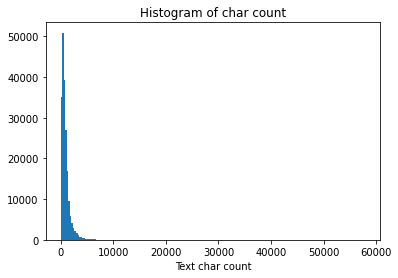

In [115]:
#Viz of sentences' length
_ = plt.hist(df_train['text_len'], bins=200)
plt.xlabel('Text char count')
plt.title("Histogram of char count")

### Viz of news category

Text(0.5, 0, 'category')

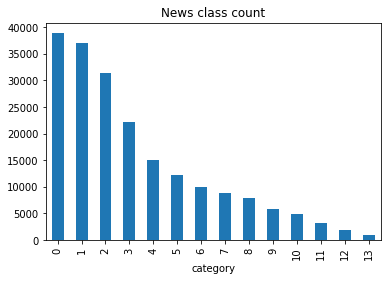

In [117]:
#Viz of news category
df_train['label'].value_counts().plot(kind='bar')
plt.title('News class count')
plt.xlabel("category")

在数据集中标签的对应的关系如下：{'科技': 0, '股票': 1, '体育': 2, '娱乐': 3, '时政': 4, '社会': 5, '教育': 6, '财经': 7, '家居': 8, '游戏': 9, '房产': 10, '时尚': 11, '彩票': 12, '星座': 13}
从统计结果可以看出，赛题的数据集类别分布存在较为不均匀的情况。在训练集中科技类新闻最多，其次是股票类新闻，最少的新闻是星座新闻。

### Word frequencty

In [118]:
from collections import Counter

#### Find the most/least frequent word

In [135]:
all_lines = ' '.join(list(df_train['text']))
type(all_lines)

str

In [136]:
word_count = Counter(all_lines.split(" "))
word_count = sorted(word_count.items(), key=lambda d:int(d[1]), reverse = True)

In [137]:
print(len(word_count))
# in total there are 6869 words in the dataset

6869


In [139]:
print(word_count[0])
print(word_count[1])
print(word_count[2])
print(word_count[3])
print(word_count[4])

('3750', 7482224)
('648', 4924890)
('900', 3262544)
('3370', 2020958)
('6122', 1602363)


In [140]:
print(word_count[-1])

('3133', 1)


#### Find punctuation marks

这里还可以根据字在每个句子的出现情况，反推出标点符号。下面代码统计了不同字符在句子中出现的次数，其中字符3750，字符900和字符648在20w新闻的覆盖率接近99%，很有可能是标点符号。

In [141]:
df_train['text_unique'] = df_train['text'].apply(lambda x: ' ' .join(list(set(x.split(' ')))))
#df_train

,label,text,text_len,text_unique
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...,1057,7305 5598 885 307 4148 2192 7440 1991 7029 316...
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...,486,6875 62 1394 307 6395 478 6919 4939 5938 6182 ...
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...,764,4351 383 5598 7025 1325 5640 2192 2570 3263 44...
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 549...,1570,790 1070 1582 5598 307 5284 4148 3469 2192 233...
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...,307,5264 751 1906 462 4351 1043 1722 5909 1394 559...
5,9,3819 4525 1129 6725 6485 2109 3800 5264 1006 4...,1050,462 4351 1070 5385 1582 5598 307 736 6919 2334...
6,3,307 4780 6811 1580 7539 5886 5486 3433 6644 58...,267,3613 462 5486 5385 1394 5598 307 1519 4939 422...
7,10,26 4270 1866 5977 3523 3764 4464 3659 4853 517...,876,6078 7305 462 6176 1070 6968 383 1582 5598 885...
8,12,2708 2218 5915 4559 886 1241 4819 314 4261 166...,314,6220 4261 5330 751 1906 790 3223 920 3700 2477...
9,3,3654 531 1348 29 4553 6722 1474 5099 7541 307 ...,1086,2151 3515 4504 790 1906 4351 531 1871 5486 561...


In [142]:
all_lines1 = ' '.join(list(df_train['text_unique']))
word_count1 = Counter(all_lines1.split(" "))
word_count1 = sorted(word_count1.items(), key=lambda d:int(d[1]), reverse = True)

In [148]:
print(word_count1[0])
print(word_count1[1])
print(word_count1[2])
print(word_count1[3])
print(word_count1[4])

('3750', 197997)
('900', 197653)
('648', 191975)
('2465', 177310)
('6122', 176543)


数据分析的结论
通过上述分析我们可以得出以下结论：

赛题中每个新闻包含的字符个数平均为1000个，还有一些新闻字符较长；
赛题中新闻类别分布不均匀，科技类新闻样本量接近4w，星座类新闻样本量不到1k；
赛题总共包括7000-8000个字符；

通过数据分析，我们还可以得出以下结论：

每个新闻平均字符个数较多，可能需要截断；

由于类别不均衡，会严重影响模型的精度；

本章小结
本章对赛题数据进行读取，并新闻句子长度、类别和字符进行了可视化分析。


本章作业
假设字符3750，字符900和字符648是句子的标点符号，请分析赛题每篇新闻平均由多少个句子构成？

In [163]:
type(word_count[0][0])
#word_count[0][0]

str

In [162]:
sentence_number = int(word_count[0][0]) + int(word_count[1][0]) + int(word_count[2][0])
sentence_number 

5298

In [ ]:
统计每类新闻中出现次数对多的字符

In [182]:
df2 = df_train.groupby(['label'], sort=True)['text_len'].max()
df2

label
0     18587
1     57921
2     41894
3     10817
4     14928
5     15839
6     25728
7     14469
8     15271
9     23866
10    20622
11     5729
12     8737
13     6399
Name: text_len, dtype: int64